## importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

## Importing the data set

About Data Set:
1. This data set is downloaded from kaggle and contains transaction made by European cardholders.
2. It contains following features - Time , V1, V2, V3, ...., V28, Amount, class
3. V1, V2 , ..., V28 are the principal components obtained from PCA.
4. Time - the seconds elapsed between each transaction and the first transaction in the dataset
5. Amount - the transaction amount
6. class - response variable (0 for no fraud and 1 for fraud)

In [2]:
credit_card = pd.read_csv("./data/creditcard.csv")

In [3]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#description of data
print(len(credit_card))
print(credit_card.describe())

284807
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  

In [5]:
credit_card["Class"].value_counts() # counts the no. of times each distinct value shows

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
print("Percentage of real fraud transactions: ", (492/len(credit_card))*100)

Percentage of real fraud transactions:  0.1727485630620034


In [7]:
fraud_transactions = credit_card[credit_card["Class"] == 1]
valid_transactions = credit_card[credit_card["Class"] == 0]

In [8]:
#Amount details for fraud transactions

print(fraud_transactions["Amount"].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [9]:
#Amount details for valid transactions

print(valid_transactions["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


#### Plotting the correlation between the features of the data set.
This will help us know if the independent variables have some relation among them.
done using the corr() from pandas

In [10]:
correlation_matrix = credit_card.corr()

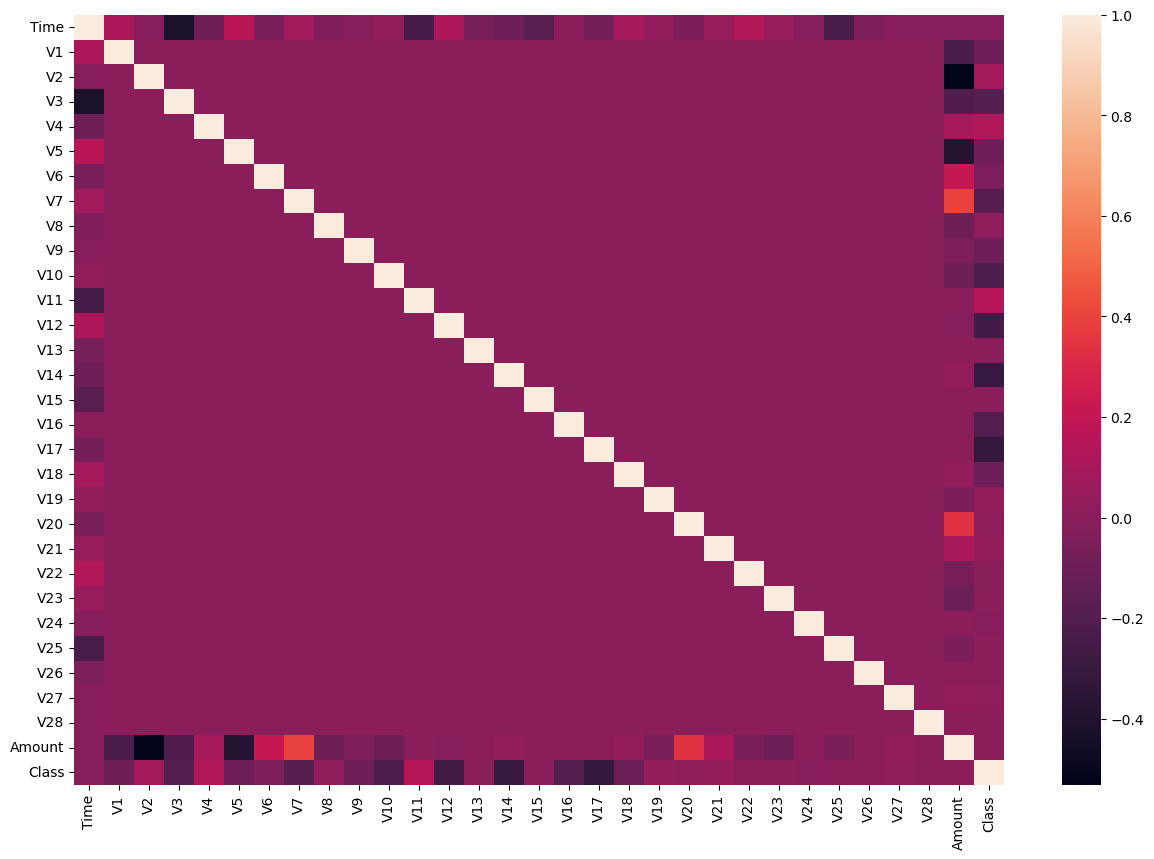

In [11]:
#Plotting the matrix

fig = plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, vmax=1, square=False)
plt.show()

#### from the plot we can see that only a few pairs have correlation

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x_data = credit_card.drop("Class", axis=1)
y_data = credit_card["Class"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [13]:
y_predicted = model.predict(x_test)
y_predicted

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def scoreTheModel(y_predict, y_true):
    accuracy = accuracy_score(y_true, y_predict)
    precision = precision_score(y_true, y_predict)
    f1 = f1_score(y_true, y_predict)
    recall = recall_score(y_true, y_predict)

    print("Accuracy Score: ", round(accuracy*100, 5))
    print("Precision Score: ", round(precision*100, 5))
    print("F1 Score: ", round(f1*100, 5))
    print("Recall Score: ", round(recall*100, 5))

    return {
        "accuracy": round(accuracy*100, 5),
        "precision": round(precision*100, 5),
        "f1": round(f1*100, 5),
        "recall": round(recall*100, 5)
    }

In [15]:
scoreTheModel(y_predicted, y_test)

Accuracy Score:  99.96138
Precision Score:  98.71795
F1 Score:  87.5
Recall Score:  78.57143


{'accuracy': 99.96138, 'precision': 98.71795, 'f1': 87.5, 'recall': 78.57143}

### Saving and exporting the model

In [17]:
import pickle

pickle.dump(model, open("credit_card_fraud_detection.pkl", "wb"))